# Welcome to Telco Churn Customers analysis and Prediction
_______________________________________
![](http://dataskunkworks.com/wp-content/uploads/2018/05/churn-1024x482.png)


## Description of dataset
## Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

## Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

## The data set includes information about:

<b>Customers who left within the last month</b> – the column is called Churn<br>
<b>Services that each customer has signed up for</b> – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies<br>
<b>Customer account information</b> – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges<br>
<b>Demographic info about customers</b> – gender, age range, and if they have partners and dependents<br><br>
## Inspiration
To explore this type of models and learn more about the subject.
__________________________________

## Objectives:
I will explore the data and try to answer some questions like:
- What's the % of Churn Customers and customers that keep in with the active services.
- We can see different patterns in Churn Customers based on the type of service provided?
- We have difference pattern of churn between genders ?
- What's the difference between customers that pay monthly and by year?
- what's the most profitable service types?
- What's the amount lose in revenue?
- What's the mean age of papeless customers? they are more propense to churn? 
- A lot of other questions that will raise trought the exploration

## After EDA 
I will build a pipeline to find a model that better fits our data.
With the best models I will predict the result and verify the scores of the models. 
<br>
I hope you enjoy the Kernel. <br>



## Importing Libraries

In [32]:
import numpy as np # linear algebra
from scipy import stats # statistic library
import pandas as pd # To table manipulations
import seaborn as sns
import matplotlib.pyplot as plt

# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode
import cufflinks
import cufflinks as cf
import plotly.figure_factory as ff

# Using plotly + cufflinks in offline mode
init_notebook_mode(connected=True)
cufflinks.go_offline(connected=True)

import os

#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split, KFold, cross_validate

#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier, RandomTreesEmbedding

In [2]:
def binary_ploting_distributions(df, cat_col):
    from plotly import tools

    fig = tools.make_subplots(rows=1,
                              cols=2,
                              print_grid=True,
                              horizontal_spacing=0.15, 
                              subplot_titles=("Distribution of and % Churn", 
                                              f'Mean Monthly Charges of {cat_col}') 
                             )

    tmp_churn = df[df['Churn'] == 1]
    tmp_no_churn = df[df['Churn'] == 0]
    tmp_attr = round(tmp_churn[cat_col].value_counts().sort_index() / df_train[cat_col].value_counts().sort_index(),2)*100

    trace1 = go.Bar(
        x=tmp_churn[cat_col].value_counts().sort_index().index,
        y=tmp_churn[cat_col].value_counts().sort_index().values,
        name='Yes_Churn',opacity = 0.8, marker=dict(
            color='seagreen',
            line=dict(color='#000000',width=1)))

    trace2 = go.Bar(
        x=tmp_no_churn[cat_col].value_counts().sort_index().index,
        y=tmp_no_churn[cat_col].value_counts().sort_index().values,
        name='No_Churn', opacity = 0.8, 
        marker=dict(
            color='indianred',
            line=dict(color='#000000',
                      width=1)
        )
    )

    trace3 =  go.Scatter(   
        x=tmp_attr.sort_index().index,
        y=tmp_attr.sort_index().values,
        yaxis = 'y2',
        name='% Churn', opacity = 0.6, 
        marker=dict(
            color='black',
            line=dict(color='#000000',
                      width=2 )
        )
    )

    df_tmp = (df_train.groupby(['Churn', cat_col])['MonthlyCharges'].mean().reset_index())

    tmp_churn = df_tmp[df_tmp['Churn'] == 1]
    tmp_no_churn = df_tmp[df_tmp['Churn'] == 0]

    df_tmp = (df_train.groupby(['Churn', cat_col])['MonthlyCharges'].mean()).unstack('Churn').reset_index()
    df_tmp['diff_rate'] = round((df_tmp[1] / df_tmp[0]) - 1,2) * 100

    trace4 = go.Bar(
        x=tmp_churn[cat_col],
        y=tmp_churn['MonthlyCharges'], showlegend=False,
        name='Mean Charge Churn',opacity = 0.8, marker=dict(
            color='seagreen',
            line=dict(color='#000000',width=1)))

    trace5 = go.Bar(
        x=tmp_no_churn[cat_col],
        y=tmp_no_churn['MonthlyCharges'],showlegend=False,
        name='Mean Charge NoChurn', opacity = 0.8, 
        marker=dict(
            color='indianred',
            line=dict(color='#000000',
                      width=1)
        )
    )

    trace6 =  go.Scatter(   
        x=df_tmp[cat_col],
        y=df_tmp['diff_rate'],
        yaxis = 'y2',
        name='% Diff Churn', opacity = 0.6, 
        marker=dict(
            color='black',
            line=dict(color='#000000',
                      width=5 )
        )
    )

    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 1) 
    fig.append_trace(trace3, 1, 1)
    fig.append_trace(trace4, 1, 2)
    fig.append_trace(trace5, 1, 2)
    fig.append_trace(trace6, 1, 2) 

    fig['data'][2].update(yaxis='y3')
    fig['data'][5].update(yaxis='y4')

    fig['layout']['xaxis'].update(autorange=True,
                                   tickfont=dict(size= 10), 
                                   title= f'{cat_col}', 
                                   type= 'category',
                                  )
    fig['layout']['yaxis'].update(title= 'Count')

    fig['layout']['xaxis2'].update(autorange=True,
                                   tickfont=dict(size= 10), 
                                   title= f'{cat_col}', 
                                   type= 'category',
                                  )
    fig['layout']['yaxis2'].update( title= 'Mean Monthly Charges' )

    fig['layout']['yaxis3']=dict(range= [0, 100], #right y-axis in subplot (1,1)
                              overlaying= 'y', 
                              anchor= 'x', 
                              side= 'right', 
                              showgrid= False, 
                              title= '%Churn Ratio'
                             )

    #Insert a new key, yaxis4, and the associated value:
    fig['layout']['yaxis4']=dict(range= [-20, 100], #right y-axis in the subplot (1,2)
                              overlaying= 'y2', 
                              anchor= 'x2', 
                              side= 'right', 
                              showgrid= False, 
                              title= 'Monhtly % Difference'
                             )
    fig['layout']['title'] = f"{cat_col} Distributions"
    fig['layout']['height'] = 500
    fig['layout']['width'] = 1000

    iplot(fig)
    
def plot_dist_churn(df, col, binary=None):
    tmp_churn = df[df[binary] == 1]
    tmp_no_churn = df[df[binary] == 0]
    tmp_attr = round(tmp_churn[col].value_counts().sort_index() / df[col].value_counts().sort_index(),2)*100
    print(f'Distribution of {col}: ')
    trace1 = go.Bar(
        x=tmp_churn[col].value_counts().sort_index().index,
        y=tmp_churn[col].value_counts().sort_index().values,
        name='Yes_Churn',opacity = 0.8, marker=dict(
            color='seagreen',
            line=dict(color='#000000',width=1)))

    trace2 = go.Bar(
        x=tmp_no_churn[col].value_counts().sort_index().index,
        y=tmp_no_churn[col].value_counts().sort_index().values,
        name='No_Churn', opacity = 0.8, 
        marker=dict(
            color='indianred',
            line=dict(color='#000000',
                      width=1)
        )
    )

    trace3 =  go.Scatter(   
        x=tmp_attr.sort_index().index,
        y=tmp_attr.sort_index().values,
        yaxis = 'y2',
        name='% Churn', opacity = 0.6, 
        marker=dict(
            color='black',
            line=dict(color='#000000',
                      width=2 )
        )
    )
    
    layout = dict(title =  f'Distribution of {str(col)} feature by Target - With Churn Rates',
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [0, 100], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= 'Percentual Churn Ratio'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    iplot(fig)
    
    
def plot_distribution(df, var_select=None, bins=1.0): 
    # Calculate the correlation coefficient between the new variable and the target
    tmp_churn = df[df['Churn'] == 1]
    tmp_no_churn = df[df['Churn'] == 0]    
    corr = df_train['Churn'].corr(df_train[var_select])
    corr = np.round(corr,3)
    tmp1 = tmp_churn[var_select].dropna()
    tmp2 = tmp_no_churn[var_select].dropna()
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Yes_churn', 'No_churn']
    colors = ['seagreen','indianred', ]

    fig = ff.create_distplot(hist_data,
                             group_labels,
                             colors = colors, 
                             show_hist = True,
                             curve_type='kde', 
                             bin_size = bins
                            )
    
    fig['layout'].update(title = var_select+' '+'(corr target ='+ str(corr)+')')

    iplot(fig, filename = 'Density plot')
    
def monthly_charges(df, col, binary=None):
    #(df_train.groupby(['Churn', 'tenure'])['MonthlyCharges'].mean()).unstack('Churn').reset_index()
    df_tmp = (df_train.groupby([binary, col])['MonthlyCharges'].mean().reset_index())
    
    tmp_churn = df_tmp[df_tmp['Churn'] == 1]
    tmp_no_churn = df_tmp[df_tmp['Churn'] == 0]

    df_tmp = (df_train.groupby([binary, col])['MonthlyCharges'].mean()).unstack('Churn').reset_index()
    df_tmp['diff_rate'] = round((df_tmp[1] / df_tmp[0]) - 1,2) * 100
    
    trace1 = go.Bar(
        x=tmp_churn[col],
        y=tmp_churn['MonthlyCharges'],
        name='Mean Charge\nChurn',opacity = 0.8, marker=dict(
            color='seagreen',
            line=dict(color='#000000',width=1)))

    trace2 = go.Bar(
        x=tmp_no_churn[col],
        y=tmp_no_churn['MonthlyCharges'],
        name='Mean Charge No Churn', opacity = 0.8, 
        marker=dict(
            color='indianred',
            line=dict(color='#000000',
                      width=1)
        )
    )
    
    trace3 =  go.Scatter(   
        x=df_tmp[col],
        y=df_tmp['diff_rate'],
        yaxis = 'y2',
        name='% Diff Churn', opacity = 0.6, 
        marker=dict(
            color='black',
            line=dict(color='#000000',
                      width=5 )
        )
    )
        
    layout = dict(title =  f'Mean Monthly Charges of {str(col)} feature by Churn or Not Churn Customers - With Churn Ratio',
              xaxis=dict(), 
              yaxis=dict(title= 'Mean Monthly Charges'), 
              yaxis2=dict(range= [0, 100], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% diff Monthly Charges Mean'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    iplot(fig)

## Importing the dataset

In [3]:
df_train = pd.read_csv('../input/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    #for name in summary['Name'].value_counts().index:
    #    summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=10),2) 

    return summary

In [5]:
#pd.DataFrame(df_train.dtypes,columns=['dtypes'])


In [7]:
resumetable(df_train)

Dataset Shape: (7043, 21)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,customerID,object,0,7043,7590-VHVEG,5575-GNVDE,3668-QPYBK
1,gender,object,0,2,Female,Male,Male
2,SeniorCitizen,int64,0,2,0,0,0
3,Partner,object,0,2,Yes,No,No
4,Dependents,object,0,2,No,No,No
5,tenure,int64,0,73,1,34,2
6,PhoneService,object,0,2,No,Yes,Yes
7,MultipleLines,object,0,3,No phone service,No,No
8,InternetService,object,0,3,DSL,DSL,DSL
9,OnlineSecurity,object,0,3,No,Yes,Yes


Very interesting.

- We can see that we have one entry for each CustomerId
- The dataset don't have missing values
- Some features are categorical
- The target the we will use to guide the exploration is Churn

## Let's investigate the data further. 
- I will get all categorical features and see their distribution by the target 
- I will calculate the Churn Rate for each value in categories

In [8]:
#CATEGORICAL VARIABLES
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                'PaperlessBilling', 'PhoneService', 'Contract', 'StreamingMovies',
                'StreamingTV', 'TechSupport', 'OnlineBackup', 'OnlineSecurity',
                'InternetService', 'MultipleLines', 'DeviceProtection', 'PaymentMethod']

## Understanding the Churn Distribution
- Let's known our target feature

In [9]:
df_train['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

CUSTOMERS %CHURN:
No     73.46
Yes    26.54
Name: Churn, dtype: float64


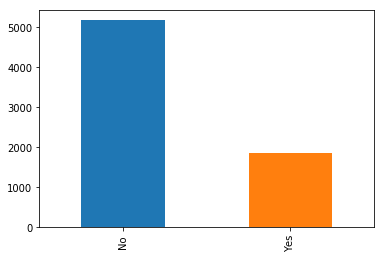

In [10]:
print("CUSTOMERS %CHURN:")
print(round(df_train['Churn'].value_counts(normalize=True) * 100,2))
# df_train.groupby('Churn')['customerID'].count().iplot(kind='bar', title='Churn (Target) Distribution', 
#                                                      xTitle='Customer Churn?', yTitle='Count')

df_train.Churn.value_counts().plot.bar()

We have 26.5% of our data that is about the Churned customers, and I will try to understand the pattern of these groups<br>
I will filter the dataset and set an dataset for Churn and Non Churn Customers.
- Also, I will see if monthly Charges has some difference to Churn and Non-Churn Customers. <br>
- I have the hipotesis that maybe Churn customers has a highest mean value of no churn customers

## Monthly Charges Distribution
Let's see the distribution of Monthly Charges by Churn and No Churn Customers. 


In [11]:
df_train['TotalCharges'].isnull().sum()

0

The mininum value in Monthly Charges is 18.25 and the maximum is 118.75
The mean Monthly Charges of Churn Customers is 64.76      
The mean Monthly Charges of Non-churn Customers is nan


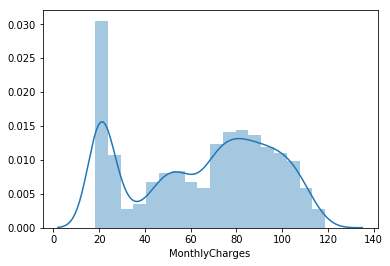

In [12]:
#df_train['TotalCharges'].fillna(df_train['MonthlyCharges'], inplace=True)
#df_train['Churn'] = df_train.Churn.replace({'Yes': 1, 'No': 0})
print(f"The mininum value in Monthly Charges is {df_train['MonthlyCharges'].min()} and the maximum is {df_train['MonthlyCharges'].max()}")
print(f"The mean Monthly Charges of Churn Customers is {round(df_train[df_train['Churn'] != 0]['MonthlyCharges'].mean(),2)}\
      \nThe mean Monthly Charges of Non-churn Customers is {round(df_train[df_train['Churn'] == 0]['MonthlyCharges'].mean(),2)}")

#plot_distribution(df_train, 'MonthlyCharges', bins=4.0)
sns.distplot(df_train['MonthlyCharges'])


## Ploting all categorical features 

In [13]:
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


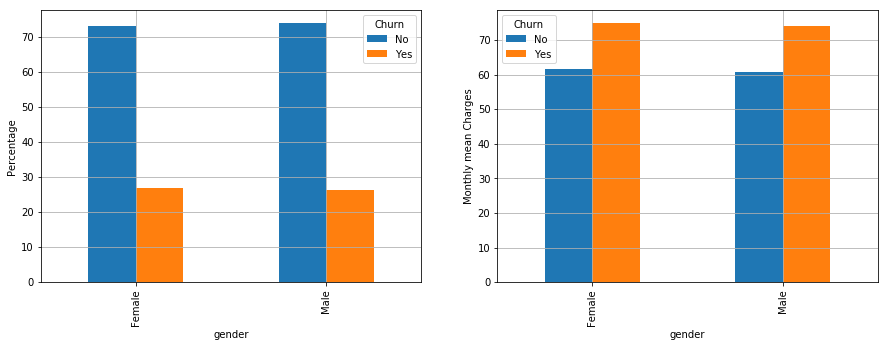

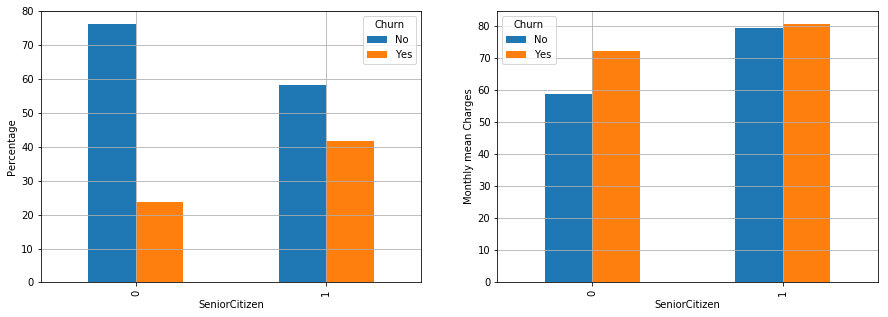

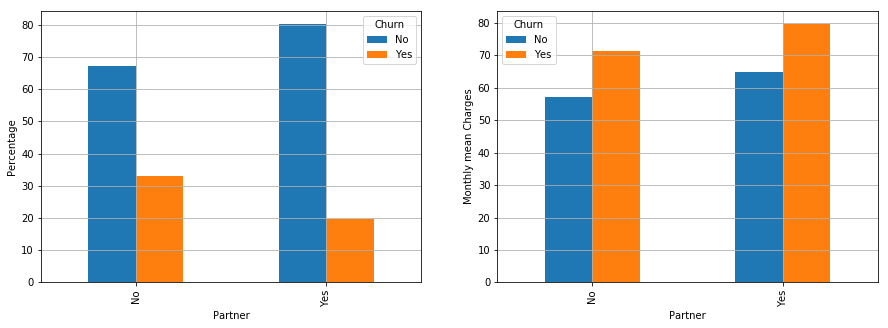

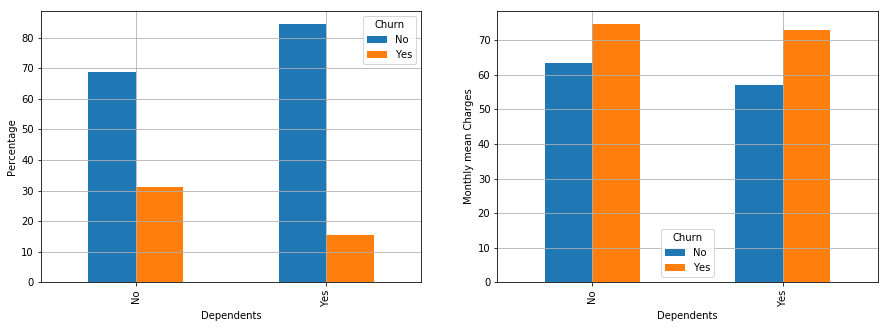

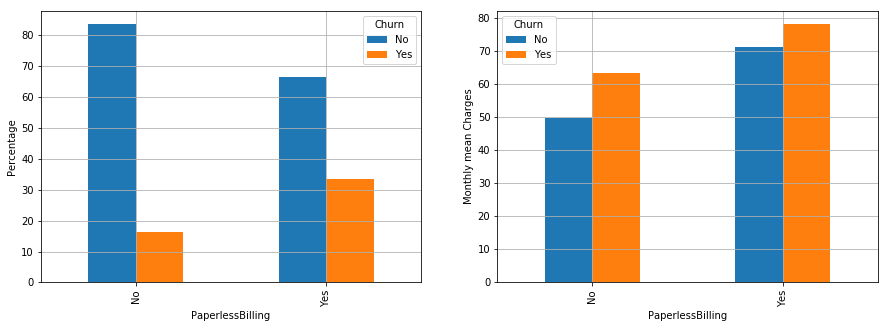

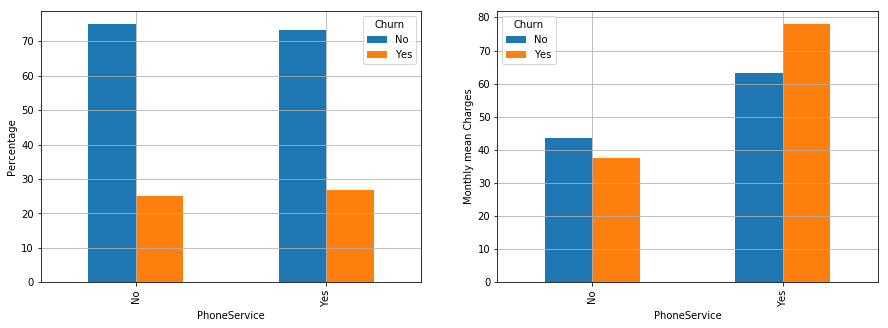

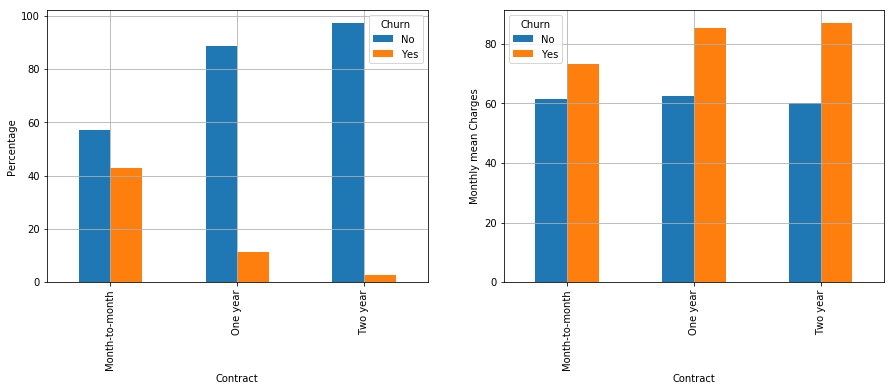

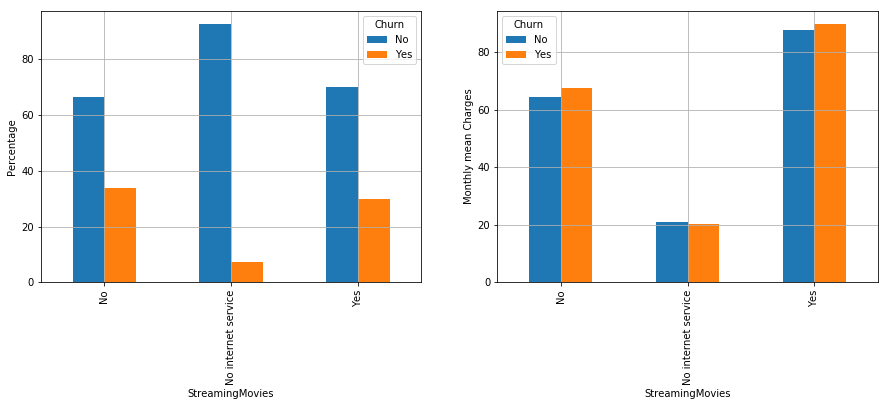

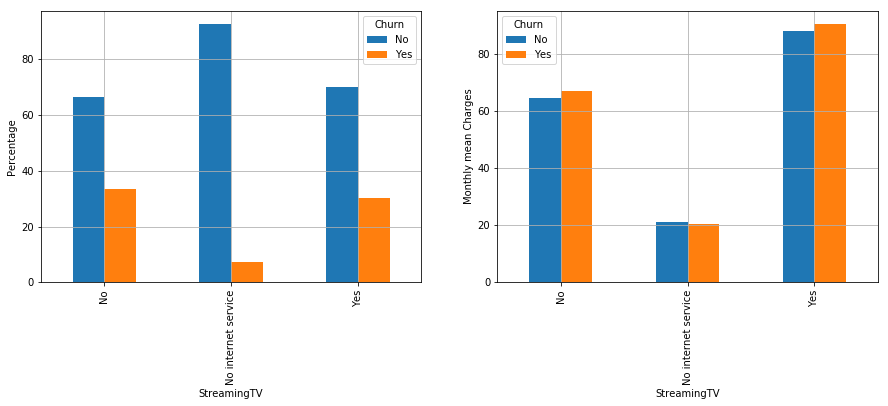

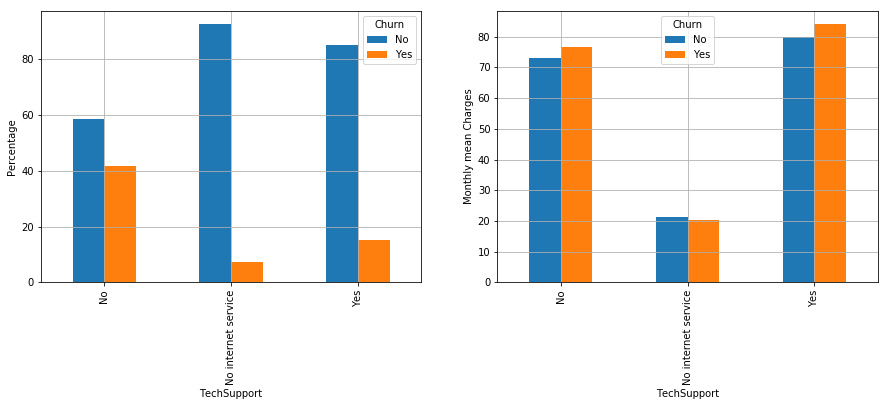

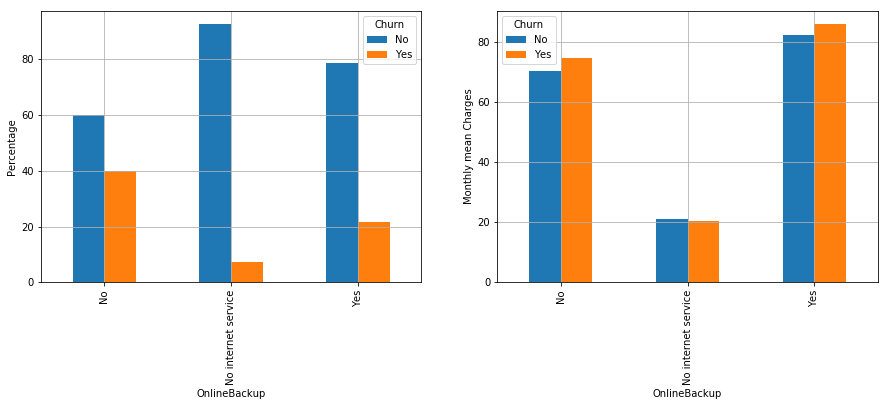

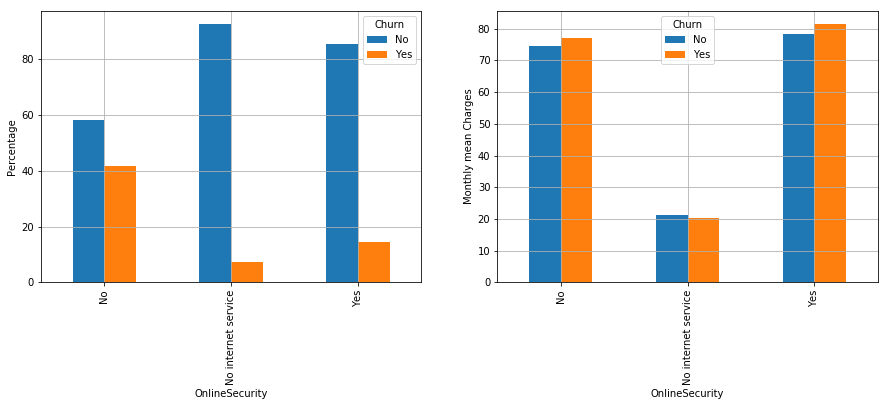

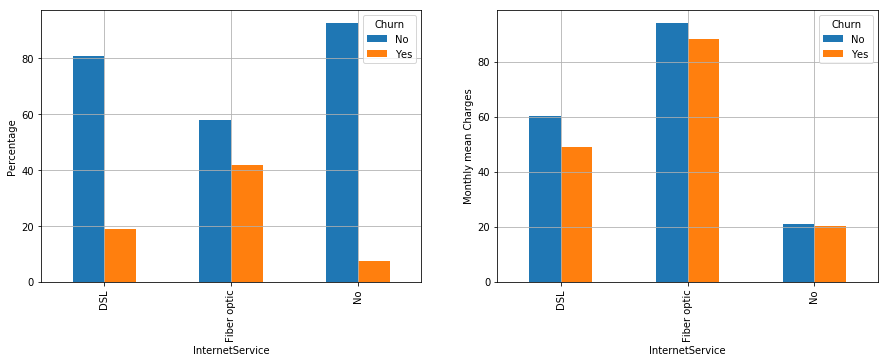

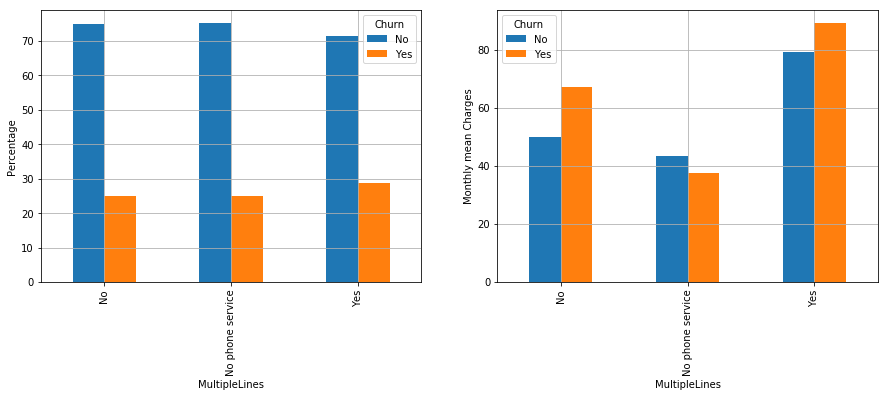

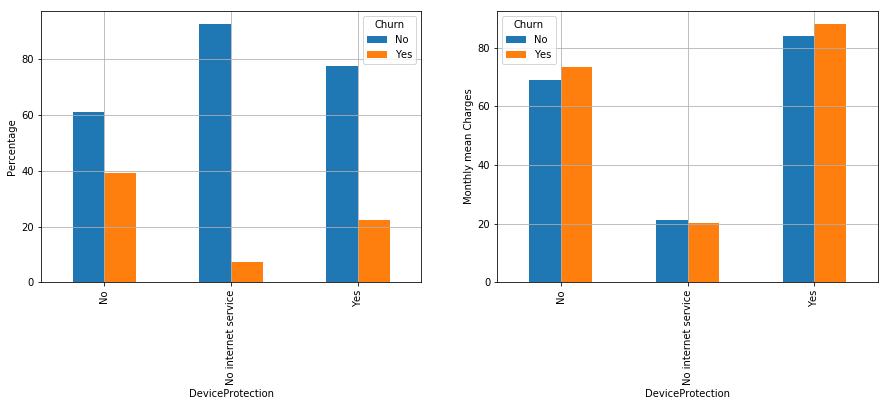

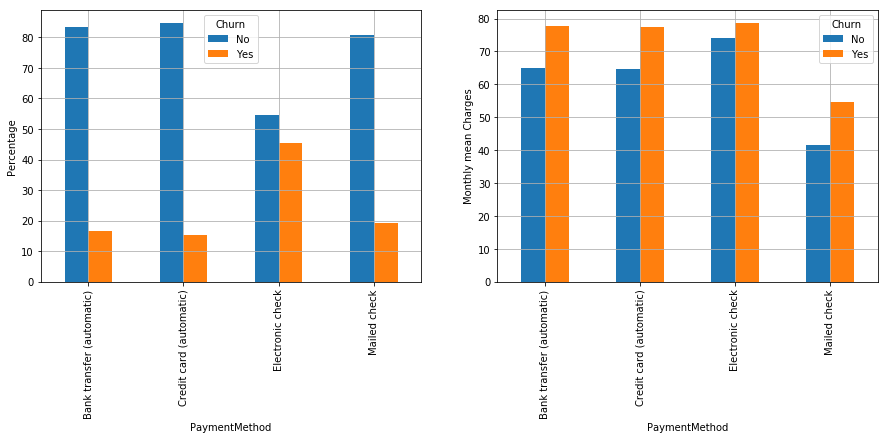

In [14]:
## I did some modifications but you can see the original on IBM 
df_plot=df_train
df_plot['Churn'] = df_plot.Churn.replace({1: 'Yes Churn', 0: 'No Churn'})
for col in cat_features:
    df_pivot = pd.pivot_table(
    df_train, 
    values="MonthlyCharges",
    index=col,
    columns="Churn", 
    aggfunc=np.mean
    )
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
    ax1 = round((df_plot.groupby(col).Churn.value_counts(normalize=True)*100),2).unstack(level=1).plot(kind='bar',ax=axes[0],grid=True)
    ax1.set_ylabel("Percentage")
    ax2 = df_pivot.plot(kind="bar",ax=axes[1],grid=True)
    ax2.set_ylabel('Monthly mean Charges')



Analyzing the outputs we can note that:
- Gender,  PhoneService, MultipleLines don't have a clear difference Churn Rates between the values in categories
- The other features seems that could be possible to help algorithmn predict Churn Customers
- The features with the churn ratio values higher or equal to 40%: <br>
-- Internet service<br>
-- online Security<br>
-- online Backup<br>
-- tech support<br>
-- contract<br>
-- seniorcitzen<br>

We can see that in some categories, the churn customers have highest mean of monthly charges.

## Understanding the distribution of Total services provided for each Customer and the Churn % Rate

In [15]:
df_train['internet']= np.where(df_train.InternetService != 'No', 'Yes', 'No')

df_train['num_services'] = (df_train[['PhoneService', 'OnlineSecurity',
                                      'OnlineBackup', 'DeviceProtection', 
                                      'TechSupport', 'StreamingTV', 
                                      'StreamingMovies', 'internet']] == 'Yes').sum(axis=1)

Text(0, 0.5, 'Monthly mean Charges')

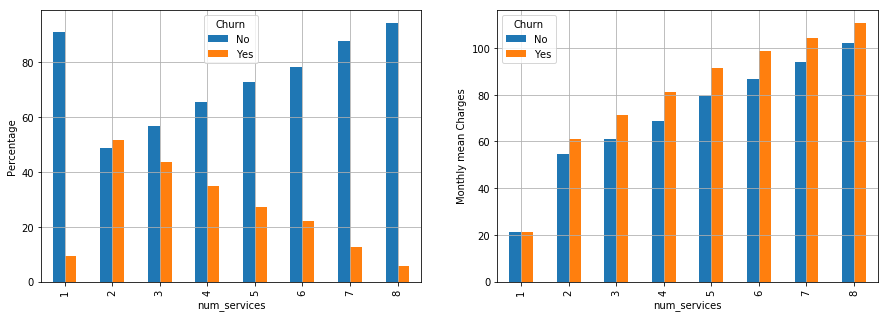

In [16]:
df_pivot = pd.pivot_table(
    df_train, 
    values="MonthlyCharges",
    index='num_services',
    columns="Churn", 
    aggfunc=np.mean
    )
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
ax1 = round((df_plot.groupby('num_services').Churn.value_counts(normalize=True)*100),2).unstack(level=1).plot(kind='bar',ax=axes[0],grid=True)
ax1.set_ylabel("Percentage")
ax2 = df_pivot.plot(kind="bar",ax=axes[1],grid=True)
ax2.set_ylabel('Monthly mean Charges')

We have 22% of customers with only one service contracted... Of people with 1 service contract, 95% are Phone Service and 5% of total are DSL; 

Altought we have some part of our sample with one service, we can see that people with two services are more propense to left. 

100% of Customers with total of services 2+ has internet (DSL or Fiber)

## Based on Num Services
- I thought in see what's the Contract Type and the Churn distribution by each group

TOTAL NUMBER OF SERVICES BY CONTRACT AND CHURN


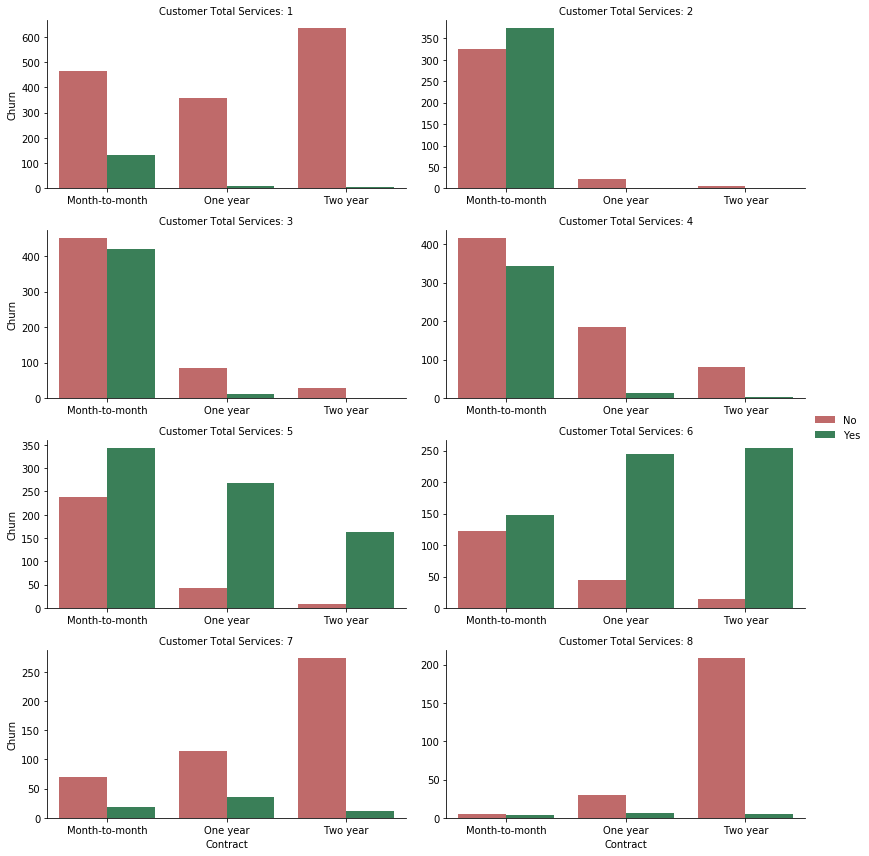

In [17]:
def countplot(x, hue, **kwargs):
    sns.countplot(x=x, hue=hue, **kwargs, order=['Month-to-month', 'One year', 'Two year'])

print("TOTAL NUMBER OF SERVICES BY CONTRACT AND CHURN")
grid = sns.FacetGrid(data=df_train,col='num_services', col_wrap=2,
                     aspect=1.9, height=3, sharey=False, sharex=False)
fig = grid.map(countplot,'Contract','Churn', palette=['indianred', 'seagreen'] )
fig.set_titles('Customer Total Services: {col_name}', fontsize=18)
fig.add_legend()

plt.show()

Very cool and meaningful visualization.

We can see difference in Contract feature in different total services that a customer has. 

## Knowning the Numerical Features
- The total features is object because it contains blank space. <br>
- When exploring the dataset, I noted that these values occurs in customers with tenure 0, that don't have generated the first bill.


In [18]:
df_train.loc[df_train['TotalCharges'] == ' ', 'TotalCharges']=np.nan
df_train['TotalCharges'] = df_train['TotalCharges'].astype(float)

- I will fill this Na's values with zero

## Total of the Monthly Revenue Lose 

Total Amount of Monthly Charges by each group: 
Churn
No     316986.0
Yes    139131.0
Name: MonthlyCharges, dtype: float64


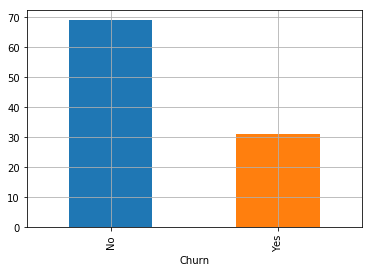

In [19]:
df_train.head()
print("Total Amount of Monthly Charges by each group: ")
print(round(df_train.groupby('Churn')['MonthlyCharges'].sum() ))
round(df_train.groupby('Churn')['MonthlyCharges'].sum(normalize=True)/df_train['MonthlyCharges'].sum()*100 ).plot(kind='bar',grid=True,)


We can see that when we consider the amount of customers, the churn represents 26.5% of total customers, but when we consider Monthly Charges we can see that the ratio is 31% of total revenue was "lost" by people who left.

## Distribution of Total Charges
- To better view the Total Charges I will use the log of Total Charges

In [20]:
df_convert=df_train
df_convert['Churn']=df_convert.Churn.replace({'Yes':1,"No":0})
df_convert.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,internet,num_services
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Yes,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,Yes,4
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Yes,4
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Yes,4
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Yes,2


In [21]:
df_convert['TotalCharges_log'] = np.log(df_convert['TotalCharges']+1)
print(f"The mininum value in Total Charges is {df_convert['TotalCharges'].min()} and the maximum is {df_convert['TotalCharges'].max()}")
print(f"The mean Total Charges of Churn Customers is {round(df_convert[df_convert['Churn'] != 0]['TotalCharges'].mean(),2)}\
      \nThe mean Total Charges of Non-churn Customers is {round(df_convert[df_convert['Churn'] == 0]['TotalCharges'].mean(),2)}")

#plot_distribution(df_train, 'TotalCharges_log', bins=.25)

The mininum value in Total Charges is 18.8 and the maximum is 8684.8
The mean Total Charges of Churn Customers is 1531.8      
The mean Total Charges of Non-churn Customers is 2555.34


In [22]:
tmp_churn_log = df_convert[df_convert['Churn'] == 1]['TotalCharges_log']
tmp_no_churn_log = df_convert[df_convert['Churn'] == 0]['TotalCharges_log']

tmp_churn = df_convert[df_convert['Churn'] == 1]['TotalCharges']
tmp_no_churn = df_convert[df_convert['Churn'] == 0]['TotalCharges']

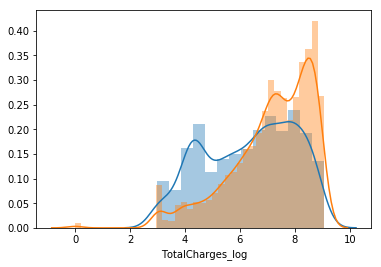

In [23]:
sns.distplot(tmp_churn_log,label="Churn")
tmp_no_churn_log=tmp_no_churn_log.replace(np.nan,0)
sns.distplot(tmp_no_churn_log,label="No Churn")

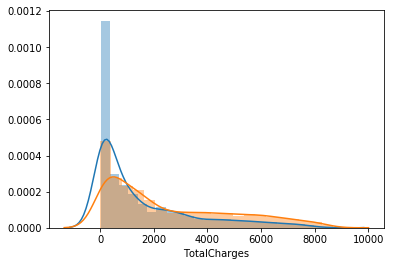

In [24]:

sns.distplot(tmp_churn,label="Churn")
tmp_no_churn=tmp_no_churn.replace(np.nan,0)
sns.distplot(tmp_no_churn,label="No Churn")

We can note that churn customers has lower values in Total Charges.... I think that it's a signal of a different tenure values; <br>
Let's check what tenure feature says.

## Tenure feature
- Let's understand the distribution and churn probabilities by Tenure

In [25]:
print(f"The mininum value in Tenure is {df_train['tenure'].min()} and the maximum is {df_train['tenure'].max()}")
print(f"The mean Tenure of Churn Customers is {round(df_train[df_train['Churn'] != 0]['tenure'].mean())}\
      \nThe mean Tenure of Non-churn Customers is {round(df_train[df_train['Churn'] == 0]['tenure'].mean())}")

The mininum value in Tenure is 0 and the maximum is 72
The mean Tenure of Churn Customers is 18      
The mean Tenure of Non-churn Customers is 38


In [26]:
#one=df_train.groupby('tenure')['Churn'].count()

In [27]:
temp=df_train.groupby(['tenure','Churn'])['Churn'].count().reset_index(name='COUNT')
sum_val=temp.groupby('tenure')['COUNT'].sum().reset_index(name='SUM')
tenure_sum=pd.merge(temp,sum_val,on='tenure')
tenure_sum['percent']=(tenure_sum['COUNT']*100.0)/tenure_sum['SUM']
churn_percent=temp[temp['Churn']==1]['Churn']/temp[temp['Churn']==1]['COUNT'].sum()

In [28]:
line_tenure=tenure_sum[tenure_sum['Churn']==1]['percent'].reset_index(name='Percent')
nums=np.arange(0,72,1)
line_tenure['tenure'] = nums.tolist()

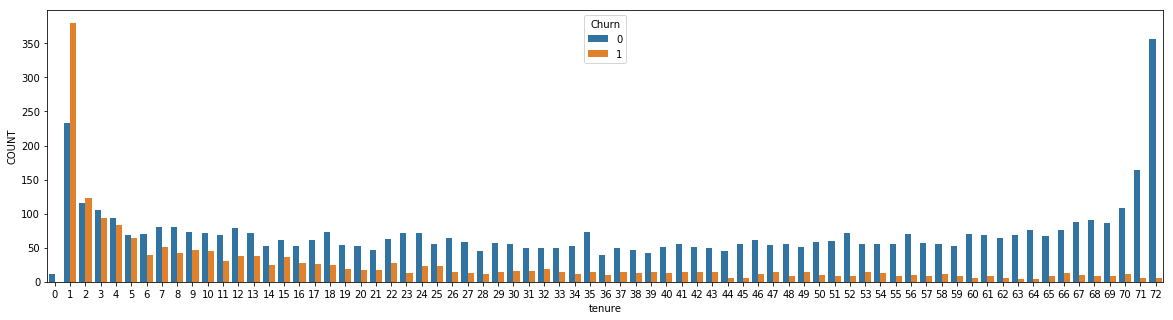

In [29]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(data=temp,x='tenure',y='COUNT',hue='Churn')
#tenure_sum[tenure_sum['Churn']==1]['percent'].reset_index(name='Percent').plot(kind='line')


[Text(0, 0.5, 'Churn Percent'), Text(0.5, 1.0, 'Churn Percent over tenure')]

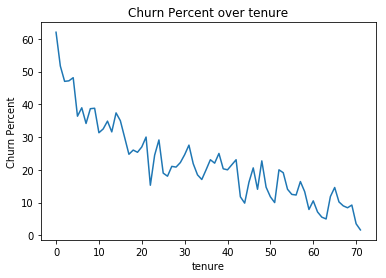

In [30]:
plt=sns.lineplot(data=line_tenure,x='tenure',y='Percent')
plt.set(ylabel='Churn Percent',title='Churn Percent over tenure')

We can see that the mean of two groups has different... To afirm it, we need to do a statistc test, but it's a very insightful visualization.

## Mean Monthly Charges by tenure with Churn Rate of tenure values

In [31]:
fig, ax = plt.subplots(figsize=(20, 5))
monthly_mean=df_train.groupby(['tenure','Churn'])['MonthlyCharges'].mean().reset_index(name='mean_monthly')
sns.barplot(data=monthly_mean,x='tenure',y='mean_monthly',hue='Churn')

AttributeError: 'AxesSubplot' object has no attribute 'subplots'

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
monthly_mean=df_train.groupby(['tenure','Churn'])['MonthlyCharges'].mean().reset_index(name='mean_monthly')
sns.barplot(data=monthly_mean,x='tenure',y='mean_monthly',hue='Churn')

In [ ]:
month_list=np.arange(0,73,1)
print(month_list)
temp_month=monthly_mean[monthly_mean['tenure']==1]['mean_monthly']
#for i in range(0,73,1):
#    temp_month=monthly_mean[monthly_mean['tenure']==i]['mean_monthly'].reset_index()
#    #(temp_month[2]-temp_month[1])/temp_month[1]
print(monthly_mean)
monthly_mean.groupby('tenure')


In [ ]:
lol=monthly_mean.groupby('tenure')


In [ ]:
lol['mean_monthly'].head()